# Laboratorium 0 - Wprowadzenie do Pythona

Laboratorium dotyczy zapozania się z aspaktem analizy i przygotowania danych w uczeniu maszynowym.

Do zadania potrzebne będą 3 zbiory danych:
1. Iris - zbiór 3 klas kwiatów oraz ich 4 wymiarów
2. Wine - zbiór 3 rodzajów win oraz ich 13 właściwości chemicznych
3. Glass - zbiór 7 rodzajów szkła oraz aż 9 atrybutów chemicznych 

W sprawozdaniu zostaną przeanalizowane dane powiązane z tymi zbiorami danych. Dodatkowo zostaną zwizualizowane między nimi zależności, a na końcu zostanie przeprowadzona na nich redukcja wymiarów (PCA)

### Importy

Import potrzebnych bibliotek
1. numpy - operacje macierzowe
2. pandas - analiza danych tabelarycznych
3. matplotlit oraz seaborn - wizualizacje
4. sklearn - import zbiorów danych wine oraz iris
5. ucimlrepo - import zbioru glass

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from ucimlrepo import fetch_ucirepo 

Wgrano wszystkie zbiory danych z odpowiednimi parametrami jako csv. 

Zbiory posiadają klucze pod którymi znajdują się ich wartości - dane.

In [2]:
# Import datasets
iris = load_iris(as_frame=True)
wine = load_wine(as_frame=True)
glass = fetch_ucirepo(id=42)

## Analiza zbioru Irysów

### Klasy, instancje, atrybuty i dystrybucje

Przeanalizowano co oferuje dataset irysów. Znalaziono w nim:
1. data - dane wielkościowe kwiatór
2. target - dane etykiet
3. frame - całość danych (wymiary oraz etykiety)
4. target_names - nazwy klas/etykiet
5. DESC - którki opis datasetu
6. feature_names - nazwy atrybutów
7. filename - nazwa pliku
8. data_module - nazwa modułu sklearn

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Zapoznano się z opisem zbioru. Ukazuje on, iż zbiór posiada 150 instancji, 4 trybuty numeryczne ciągłe podane w centymetrach. Pokazuje także nazwy 3 klas "Setosa", "Versicolour" oraz "Virginica".

Wstępny opis umożliwia ogólne zrozumienie zbioru na wysokim poziomie abstrakcji, lecz należy także przanalizować go manualnie.

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Dane przechowywane są w dataframe. Ponownie można zaobserwować nazwy kolumn oraz potwierdzić iż ich wartości są liczbami rzeczywistymi o precyzji jednej liczby po przecinku. Dodatkowo na dole widnieje informacje o 150 rekordach.

In [5]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Zbiór posiada 150 etykiet pod wartością target.

fukcja $value count()$ umożliwia zaobserwowanie równomiernej dystrybucji między klasami co z pewnością ułatwiłoby proces modelowania - równomierny rozkład klas.

In [6]:
print(iris.target)

#używamy nazw klas, aby lepiej podpisać target 
iris.frame["target"] = iris.target_names[iris.target]
iris_value_counts = iris.frame['target'].value_counts()
iris_value_counts

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

C:\Users\mikja\AppData\Local\Temp\ipykernel_9520\2032958959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=iris_value_counts.index, y=iris_value_counts.values, palette="viridis")


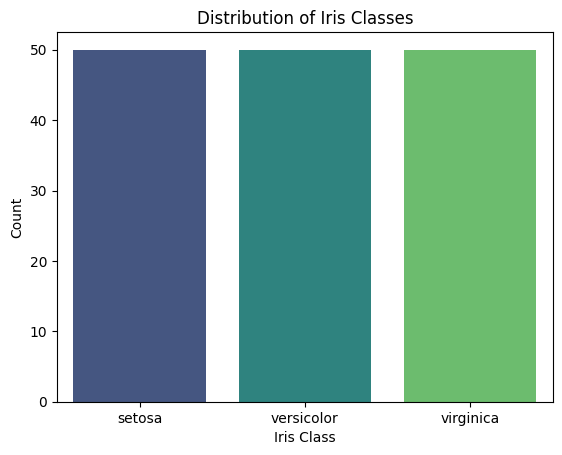

In [7]:
sns.barplot(x=iris_value_counts.index, y=iris_value_counts.values, palette="viridis")

plt.xlabel("Iris Class")
plt.ylabel("Count")
plt.title("Distribution of Iris Classes")

plt.show()

Analiza średnich wartości kwiatów ukazała pewne zależności

- **Setosa** – najmniejsze płatki, ale najszersze działki kielicha.  
- **Versicolor** – cechy pośrednie między setosą a virginicą.  
- **Virginica** – największe płatki i działki kielicha.  

In [8]:
iris.frame.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Wykres zależność długość i szerokości kielicha (sepal) dla IRIS.

Z wykresu wynika, iż można liniowo odseparować klase "Setosa" od pozostałych dwóch, lecz te są nieseparowalne liniowo i potrzeba dodatkowych atrybutów, aby moć je odróżnić

Text(0.5, 1.02, 'Wykres 1. Zależność długość i szerokości kielicha (sepal) dla IRIS')

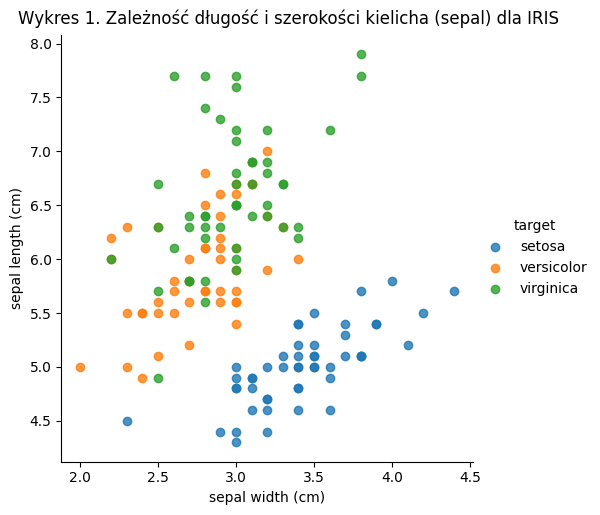

In [9]:
_ = sns.lmplot(x="sepal width (cm)", y="sepal length (cm)", data=iris.frame, hue="target", fit_reg=False)
plt.suptitle("Wykres 1. Zależność długość i szerokości kielicha (sepal) dla IRIS", y=1.02)

Analiza zależności dłogości i szerokości płatków ukazuje silne możliwości separacji klasy setosa od pozostałych kwiatów. Większy problem występuje między klasą "versicolor" i "virginica", gdzie punkty na wykresach przeplatają się w niskim stopniu oprócz porównania "sepal lenght" do "sepal width".

Wstępna analiza ukazuje, iż zbiór danych nadaje się do modelowania ze wględu na równomierny rozkład klas oraz mozliwość klasyfikacji różnych kwiatów.

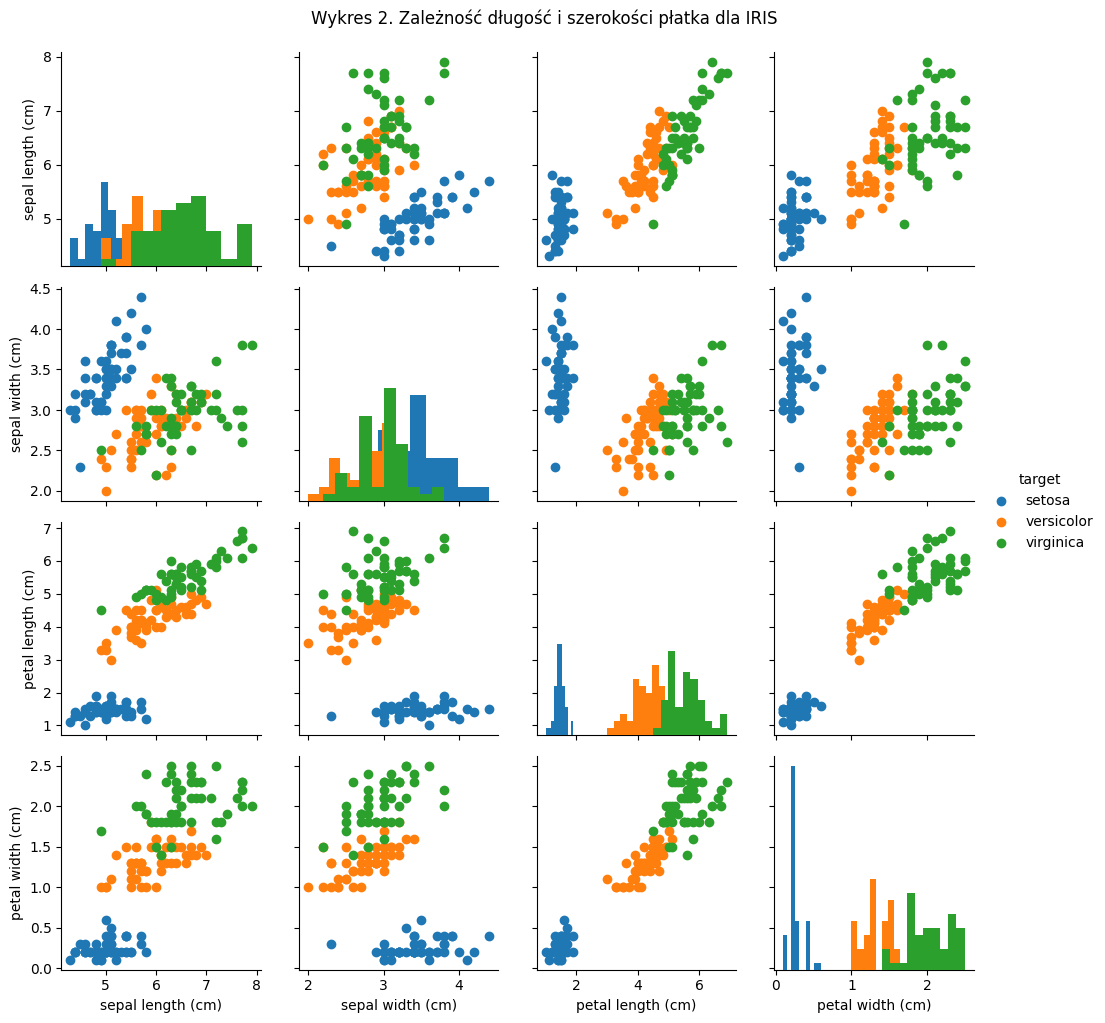

In [10]:
iris_PairGrid = sns.PairGrid(iris.frame, hue="target")
plt.suptitle("Wykres 2. Zależność długość i szerokości płatka dla IRIS", y=1.02)
iris_PairGrid.map_diag(plt.hist)
iris_PairGrid.map_offdiag(plt.scatter)
iris_PairGrid.add_legend()

### Analiza PCA

Redukcja wymiarów ukazuje, iż wystarczą 2 wymary, aby dokładnie opisać różnice między klasami.

Pierwszy wykres ukazuje potrzebną liczbę klas, a drugi zależności po zredukowanych wymiarach


In [ ]:
# Based on https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py
# Usefull to understand https://www.youtube.com/watch?v=FgakZw6K1QQ
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_analysis(data, targets, target_names):
    # normalize the data to normal distribution
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    pca_all = PCA()
    _ = pca_all.fit_transform(scaled_data)

    explained_variance = np.cumsum(pca_all.explained_variance_ratio_)
    n_components = np.argmax(explained_variance >= 0.90) + 1
    pca = PCA(n_components)
    X_reduced = pca.fit_transform(scaled_data)

    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='x')
    plt.axvline(n_components, color='r', linestyle='--', label=f'95% Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Choosing the Number of Principal Components')
    plt.legend()
    plt.show()
    

    if (n_components < 3):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=targets)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(title='Classes')
        plt.show()
    else:
        fig = plt.figure(1, figsize=(10, 8))
        ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

        scatter = ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
            X_reduced[:, 2],
            c=targets,
            s=40,
        )

        ax.set(
        title="First three PCA dimensions",
        xlabel="1st Eigenvector",
        ylabel="2nd Eigenvector",
        zlabel="3rd Eigenvector",
        )
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.zaxis.set_ticklabels([])

        legend1 = ax.legend(
            scatter.legend_elements()[0],
            target_names,
            loc="upper right",
            title="Classes",
        )
        ax.add_artist(legend1)

        plt.show()

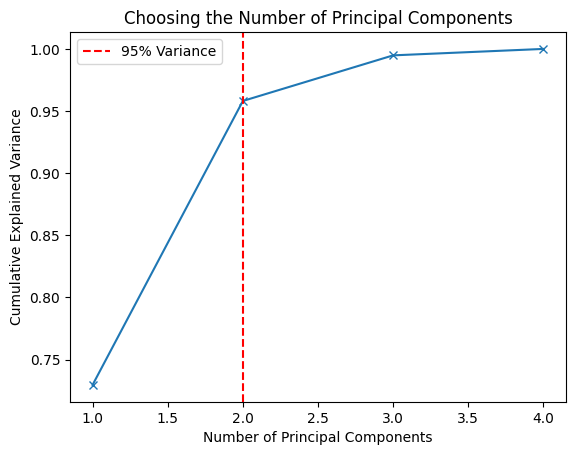

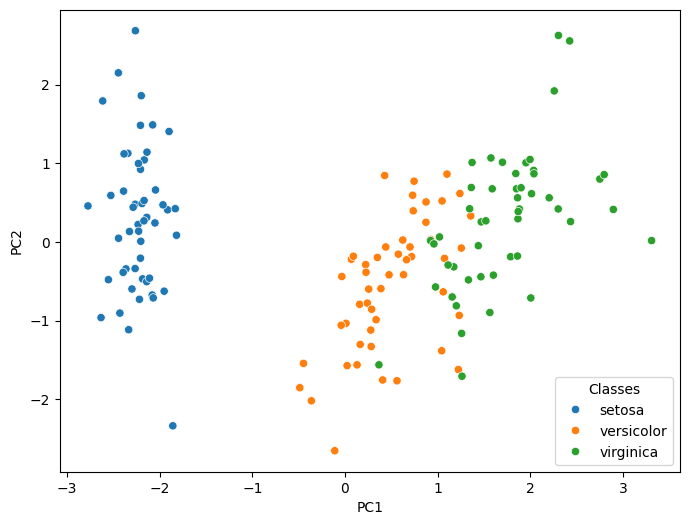

In [133]:
pca_analysis(iris.data, iris.frame['target'], iris.target_names)

## Analiza zbioru Wina

### Klasy, instancje, atrybuty i dystrybucje

Ponownie, zbiór win oferuje te same nazwy kluczy:
1. data - dane win, bez etykiet
2. target - dane etykiet
3. frame - całość danych (wymiary oraz etykiety)
4. target_names - nazwy klas/etykiet
5. DESC - którki opis datasetu
6. feature_names - nazwy atrybutów
7. filename - nazwa pliku
8. data_module - nazwa modułu sklearn

In [11]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Opis zbioru tłumaczy, iż posiada 178 instancji oraz 13 numerycznych atrybutów o wartościach rzeczywistych.

Nie specyfikuje on niestety nazw klas określając je kolejno "class_0", "class_1", "class_2".

In [12]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Ponownie dane przechowywane są w Pandas Dataframe. Wypisane nazwy kolumn potwierdzają informacje z opisu zbioru danych, występuje ich 13 oraz są pewnymi atrybutami chemicznymi danych win. Zaobserwować można 178 rekordów, co daje nam większą liczbę niż przy zbiorze irysów oraz posiadamy większą liczbę atrybutów.

In [13]:
# We can see that there are 178 resords and 13 data features, all of them contain continous values
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
print(wine.target)

#używamy nazw klas, aby lepiej podpisać target 
wine.frame["target"] = wine.target_names[wine.target]
wine_value_counts = wine.frame['target'].value_counts()
wine_value_counts

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


target
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Zbiór posiada nierównomierną dystrybuję klas. Najwięcej wystepuję 'class_1' z 71 rekordami, następnie 'class_0' z 59 rekordami, a na końcu 'class_2' z 48 rekordami.

Informacja ta oznacza, iż potencjalne modelowanie zbioru może być trudne, ze względu na nierównomierną reprezentacje klas.

C:\Users\mikja\AppData\Local\Temp\ipykernel_9520\3049145417.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wine_value_counts.index, y=wine_value_counts.values, palette="viridis")


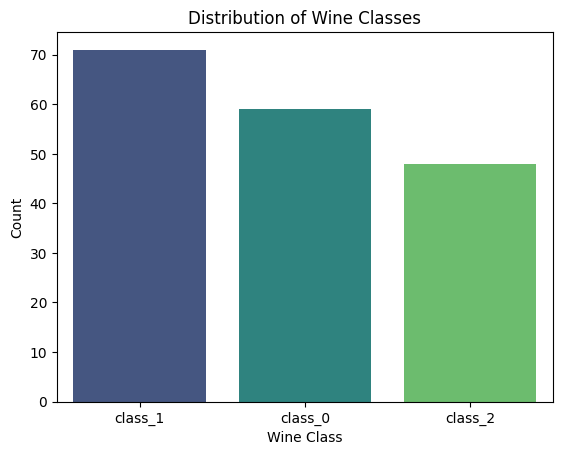

In [15]:
sns.barplot(x=wine_value_counts.index, y=wine_value_counts.values, palette="viridis")

plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.title("Distribution of Wine Classes")

plt.show()

Analiza najciekawczych atrybutów win

- **Alcohol** – najwyższa zawartość w klasie 0, najniższa w klasie 1.  
- **Flavanoids** – dominują w klasie 0, istotnie niższe w klasie 2.  
- **Color Intensity** – najwyższa w klasie 2, najniższa w klasie 1.  
- **Proline** – wyraźnie największe stężenie w klasie 0, najmniejsze w klasie 1.  

In [16]:
wine.frame.groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
class_0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
class_1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
class_2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


### Wykres zależności flawonoidów i fenolu dla WINE

Wykres ukazuje, iż nie można odseparować poszczególnych klas liniowo. Można zaobserwować pewne trendy w zależnościach, ponieważ klasa 0 posiada wyższe wartości obydwu atrybutów, klasa 1 średnie, a klasa 0 najniższe.

Text(0.5, 1.02, 'Wykres 3. Zależność flawonoidów i fenolu dla WINE')

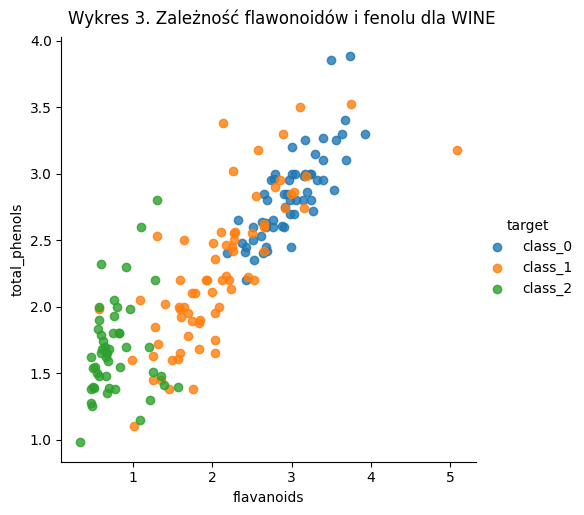

In [17]:
wine_am = wine.frame[["flavanoids", "total_phenols", "target"]]
_ = sns.lmplot(x="flavanoids", y="total_phenols", data=wine_am, hue="target", fit_reg=False)
plt.suptitle("Wykres 3. Zależność flawonoidów i fenolu dla WINE", y=1.02)

Po bliższym zapoznaniu się z wykresem można zaobserwować, iż najbardizej wyróżniającymi się atrybutami, które umożliwiają klasyfikację win są 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Alcohol', 'Color intensity', 'Proline'.

Jednocześnie analizowanie tak wielkich wykresów jest trudne i lepszym rozwiązaniem jest dzielenie atrybutów na podzbiory i analizowanie ich osobno.

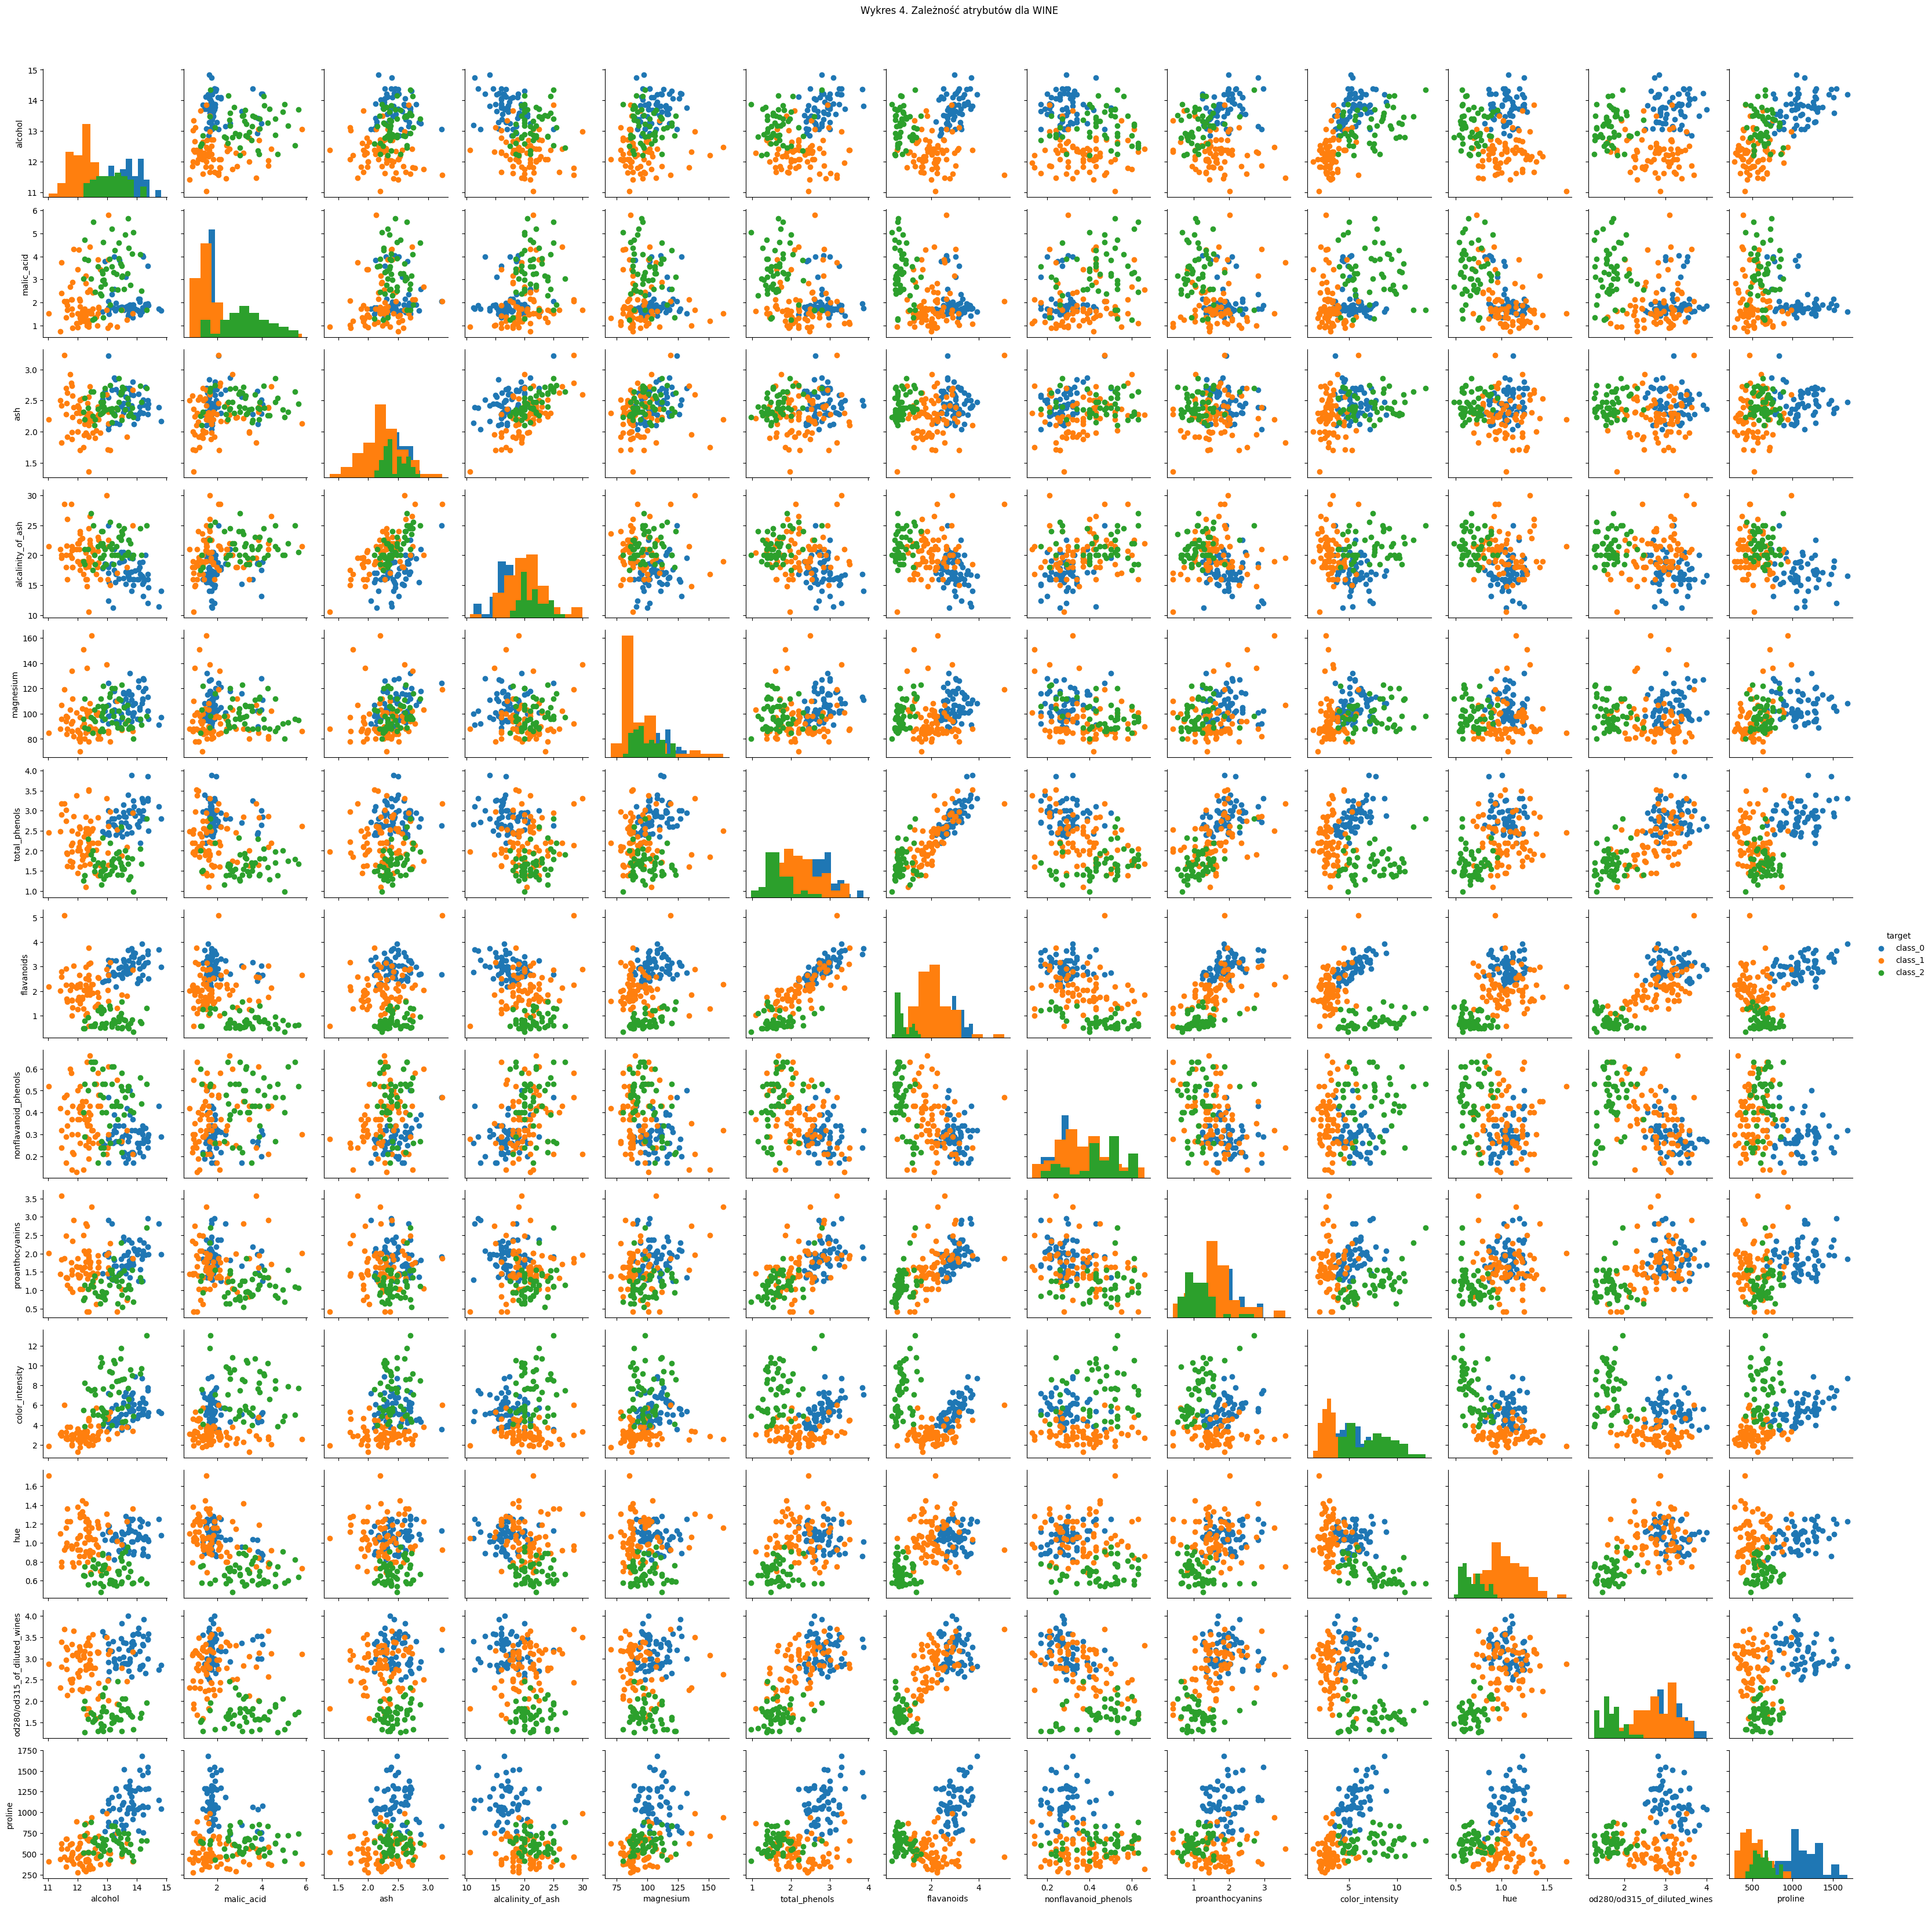

In [18]:
_ = sns.PairGrid(wine.frame, hue="target")
plt.suptitle("Wykres 4. Zależność atrybutów dla WINE", y=1.02)
_.map_diag(plt.hist)
_.map_offdiag(plt.scatter)
_.add_legend()

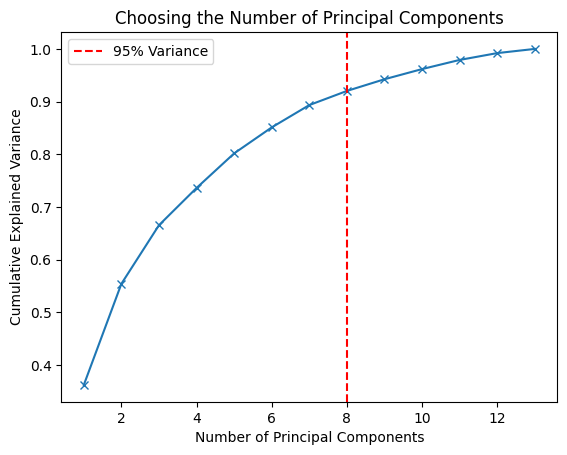

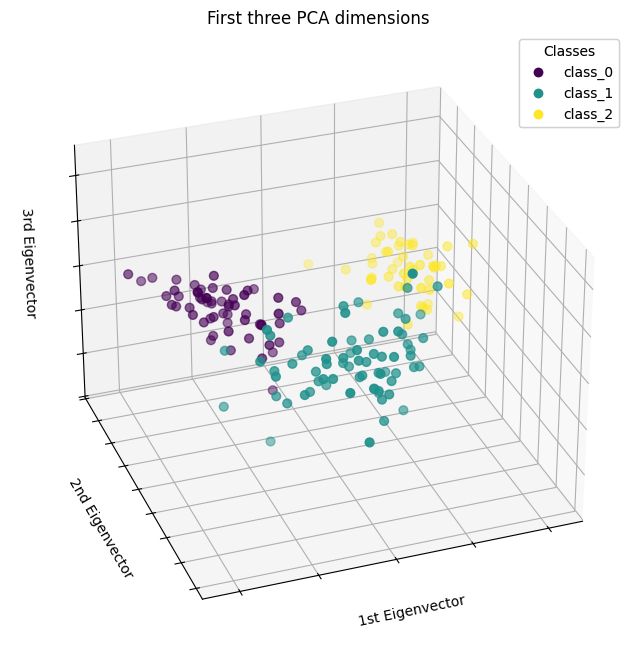

In [134]:
pca_analysis(wine.data, wine.target, wine.target_names)

## Analiza zbioru Szkła

### Klasy, instancje, atrybuty i dystrybucje

Zbiór oferuje inne klucze, ponieważ pochodzi z innego źródła - UCL zamiast sklearn.

1. metadata - opis odpowiadający DESC poprzednim zbiorom
2. variables - dokładny opis atrybutów chemicznych szkła
3. data - główny zbiór posiadający
   1. ids - id posczególnych rekordów
   2. features - dane chemiczne szkła (atrybuty)
   3. targets - nazwy klas
   4. original - dataframe (całość)
   5. headers - nagłówek originals

In [19]:
glass.keys()

dict_keys(['data', 'metadata', 'variables'])

In [20]:
glass.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

Ponownie opis zbioru oferuje podstawowe informacje, które umożliają wstępną analize. Zbiór posiada 214 rekordów, 9 atrybutów o wartościach numerycznych, rzeczywistych oraz nie posiada brakujących danych 

In [21]:
glass.metadata

{'uci_id': 42,
 'name': 'Glass Identification',
 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification',
 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv',
 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 214,
 'num_features': 9,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Type_of_glass'],
 'index_col': ['Id_number'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1987,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5WW2P',
 'creators': ['B. German'],
 'intro_paper': None,
 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available throu

Atrybuty glass to pierwiastki chemiczne, wszyskie posiadające wartości rzeczywiste. Nie brakuje danych w rekordach.

In [22]:
glass.variables

,name,role,type,demographic,description,units,missing_values
0,Id_number,ID,Integer,None,None,None,no
1,RI,Feature,Continuous,None,refractive index,None,no
2,Na,Feature,Continuous,None,Sodium,weight percent in corresponding oxide,no
3,Mg,Feature,Continuous,None,Magnesium,weight percent in corresponding oxide,no
4,Al,Feature,Continuous,None,Aluminum,weight percent in corresponding oxide,no
5,Si,Feature,Continuous,None,Silicon,weight percent in corresponding oxide,no
6,K,Feature,Continuous,None,Potassium,weight percent in corresponding oxide,no
7,Ca,Feature,Continuous,None,Calcium,weight percent in corresponding oxide,no
8,Ba,Feature,Continuous,None,Barium,weight percent in corresponding oxide,no
9,Fe,Feature,Continuous,None,Iron,weight percent in corresponding oxide,no


Zbiór posiada 214 rekordów w dataframe, wraz z ID oraz klasami posiada on 11 kolumn.

In [23]:
glass.data.original

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Zmiana nazw numerycznych na autentyczne nazwy szkła

In [24]:
type_id_to_name = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

glass.data.original["Type_of_glass"] = glass.data.original["Type_of_glass"].map(type_id_to_name)

Zbiór posada 214 etykiet o bardzo nierównomiernym rozkładzie. "tableware" posiada zaledwie 9 reprezentantów, gdzie "building_windows_non_float_processed" posiada aż 76.

In [26]:
glass_value_counts = glass.data.original["Type_of_glass"].value_counts()
glass_value_counts

Type_of_glass
building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: count, dtype: int64

C:\Users\mikja\AppData\Local\Temp\ipykernel_9520\3647094497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=glass_value_counts.index, y=glass_value_counts.values, palette="viridis")


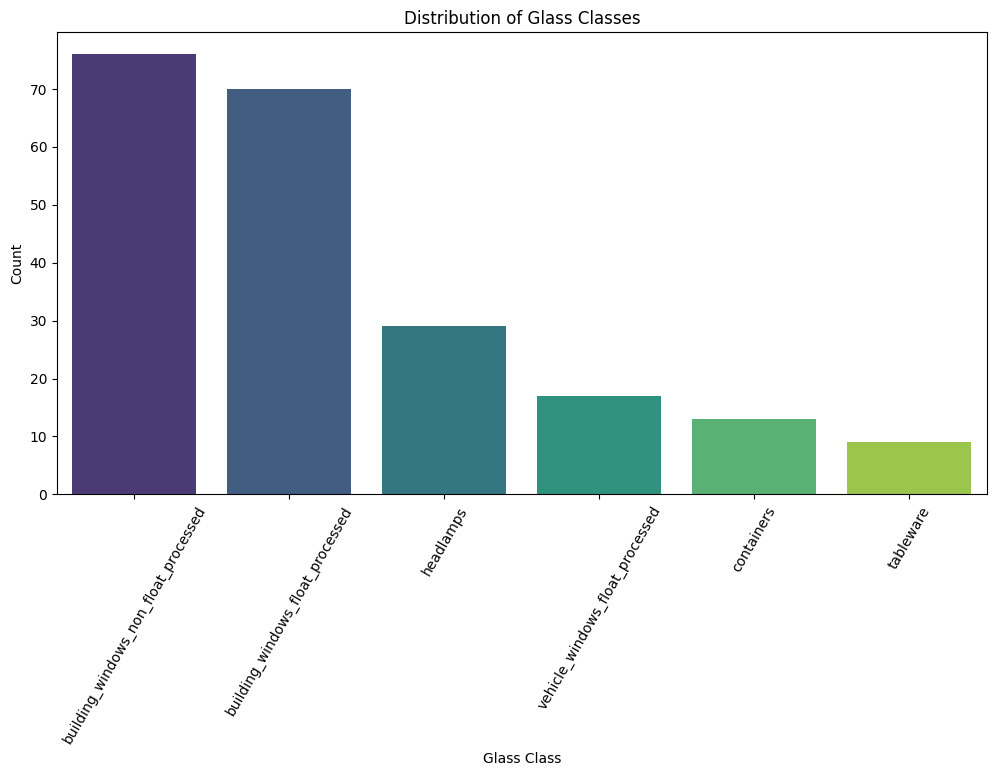

In [35]:
plt.figure(figsize=(12, 6))

sns.barplot(x=glass_value_counts.index, y=glass_value_counts.values, palette="viridis")

plt.xlabel("Glass Class")
plt.ylabel("Count")
plt.title("Distribution of Glass Classes")
plt.xticks(rotation=60)

plt.show()


#### Mediana:  
- **Building Windows (Float Processed)** i **Vehicle Windows (Float Processed)** mają zbliżoną zawartość sodu oraz tlenku glinu
- **Containers** wyróżniają się brakiem magnezu i wysoką zawartością wapnia
- **Headlamps** mają najwyższą zawartość sodu i najmniejszą ilość potasu

#### Średnia:  
- **Building Windows (Non-Float Processed)** mają nieco mniejszą średnią zawartość glinu i większą ilość wapnia w porównaniu do float processed
- **Containers** mają najwyższy poziom potasu i wapnia.
- **Headlamps** zawierają więcej baru.

Analiza dużej liczby atrybutów i klas jest bardzo trudna w formacie tabelarycznym, otrzymano z niej więcej informacji niż z analizy wizualnej

In [40]:
glass.data.original.groupby('Type_of_glass').mean()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type_of_glass,,,,,,,,,,
building_windows_float_processed,35.5,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
building_windows_non_float_processed,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
containers,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
headlamps,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448
tableware,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
vehicle_windows_float_processed,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059


In [41]:
glass.data.original.groupby('Type_of_glass').median()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type_of_glass,,,,,,,,,,
building_windows_float_processed,35.5,1.517835,13.195,3.565,1.23,72.815,0.56,8.675,0.00,0.0
building_windows_non_float_processed,108.5,1.517100,13.155,3.520,1.46,72.735,0.58,8.275,0.00,0.0
containers,170.0,1.519940,12.970,0.000,1.76,72.690,0.58,11.270,0.00,0.0
headlamps,200.0,1.516510,14.390,0.000,2.06,73.110,0.00,8.670,0.81,0.0
tableware,181.0,1.518880,14.400,1.740,1.56,72.740,0.00,9.570,0.00,0.0
vehicle_windows_float_processed,155.0,1.517690,13.420,3.530,1.28,72.640,0.56,8.790,0.00,0.0


Text(0.5, 1.02, 'Wykres 5. Zależność Współczynnika sodu i siarki dla GLASS')

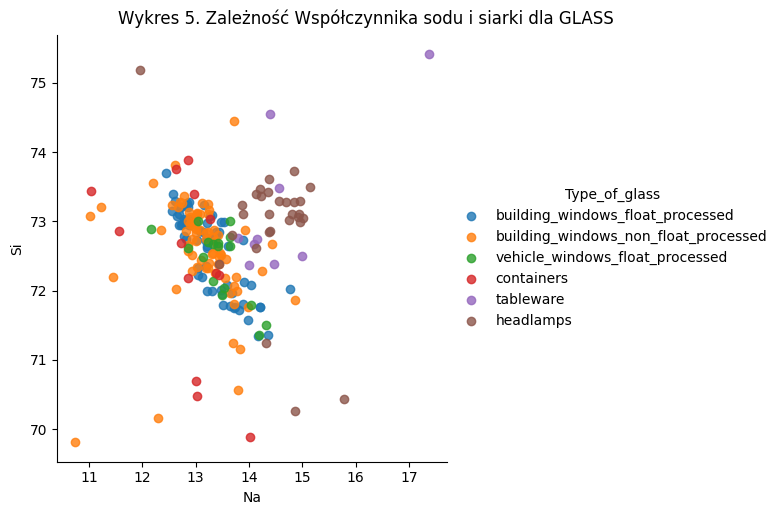

In [36]:
glass_rl_ba = glass.data.original[["Na", "Si", "Type_of_glass"]]
_ = sns.lmplot(x="Na", y="Si", data=glass_rl_ba, hue="Type_of_glass", fit_reg=False)
plt.suptitle("Wykres 5. Zależność Współczynnika sodu i siarki dla GLASS", y=1.02)

Wykres unimożliwia oszacowania możliwośći separowania klass ze względu na przytłaczającą liczbę klas do porównania.

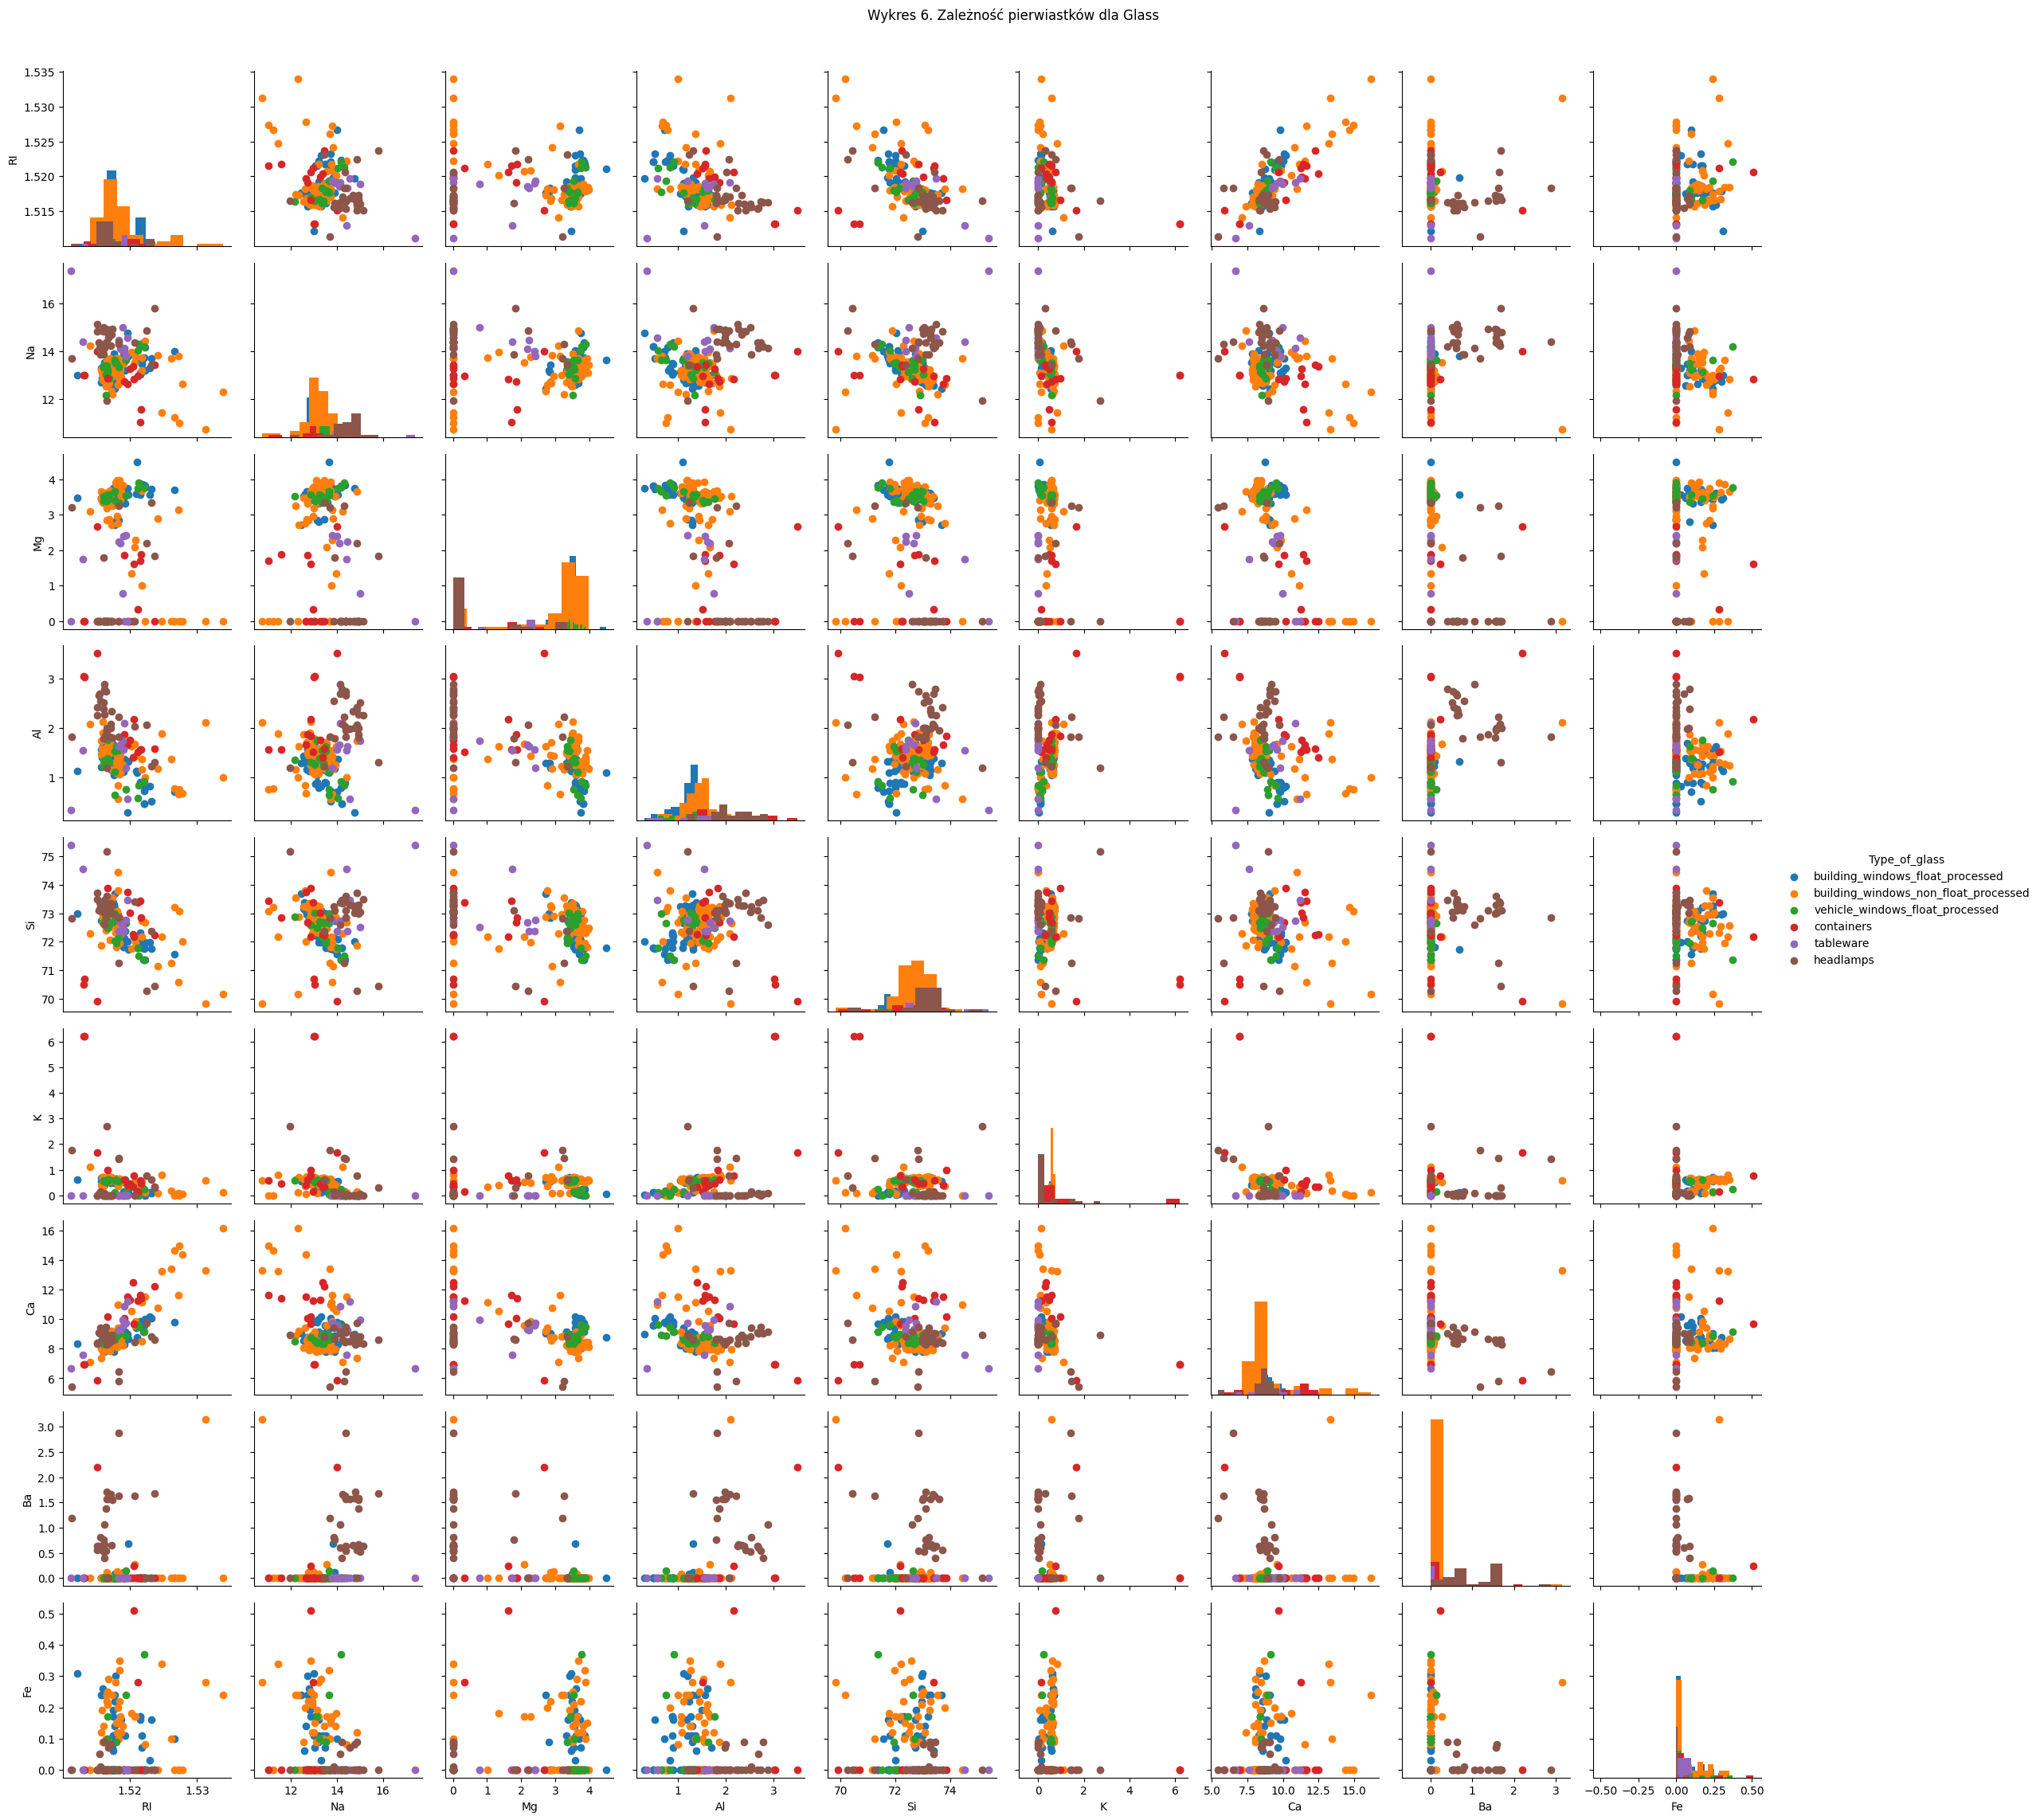

In [39]:
glass_df = glass.data.original.drop(columns=["Id_number"])

iris_PairGrid = sns.PairGrid(glass_df, hue="Type_of_glass")
plt.suptitle("Wykres 6. Zależność pierwiastków dla Glass", y=1.02)
iris_PairGrid.map_diag(plt.hist)
iris_PairGrid.map_offdiag(plt.scatter)
iris_PairGrid.add_legend()

### PCA analysis

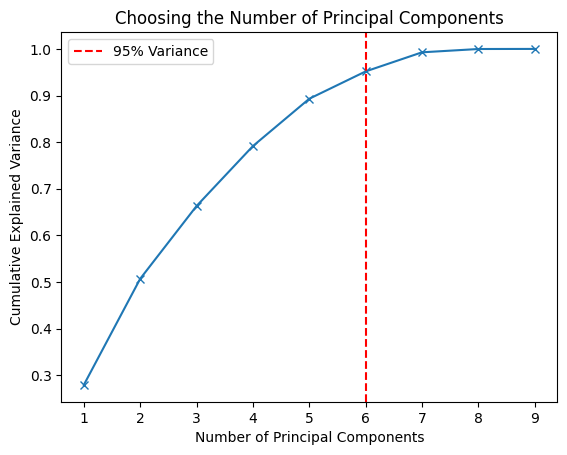

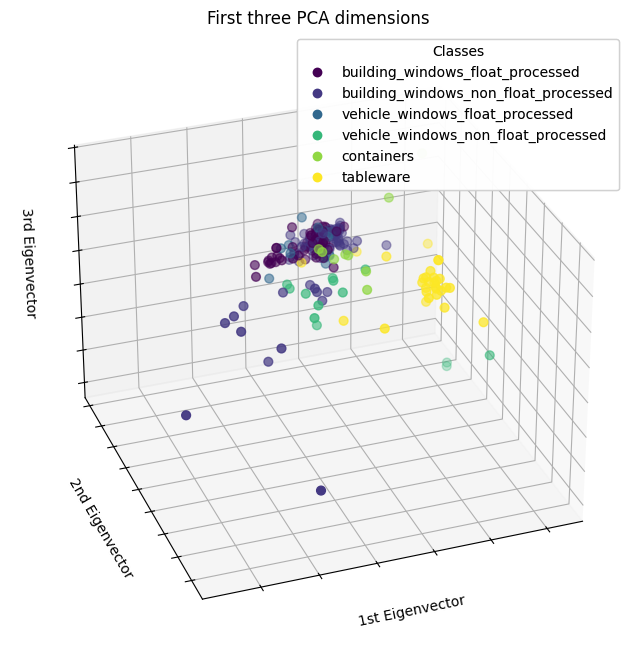

In [135]:
glass_pca_data = glass_df.drop(columns=["Type_of_glass"])
glass_target_names = list(type_id_to_name.values())

pca_analysis(glass_pca_data, glass.data.targets, glass_target_names)


Zbiór glass jest definitywnie najtrudniejszym do klasyfikacji. Mimo redukcji klas i możliwości zobrazowania wyników w 3D rekordy bardzo silnie na siebie nachodzą

## Podsumowanie


Najprostszym do analizy zbiorem jest bez wątpienia Iris. Posiada niewielką liczbę klas, a jego cechy bardzo dobrze separują poszczególne grupy i jest ich zaledwie cztery. Dzięki temu separowanie klass może być intuicyjne i skuteczne nawet przy podstawowych metodach analizy. (możliwość liniowego separowania jednej z klasy  od pozostałych)

Zbiór Wine, choć posiada więcej wymiarów niż Glass, jest znacznie łatwiejszy do analizy. Pomimo potrzeby zachowania większej liczby wymiarów przy redukcji dla tej samej wartości wariancji, klasy w tym zbiorze są lepiej rozdzielone. Dodatkowym atutem jest konieczność rodzielenia zalewdiwe 3 klas o stosunkowo akceptowalnej dystrybucji.

Zbiór Glass okazał się być zdecydowanie najtrudniejszym do analizy i potencjalnego modelowania. Poszczególne klasy są w nim słabo rozdzielone pod względem dostępnych wymiarów, co więcej ich klasy są w nieakceptowalnej dystrybucji, gdzie jedna klasa posiada 7 reprezentantów a druga 74. Nawet zaawansowane metody redukcji wymiarów nie poprawiają znacząco separacji klas.


Podsumowując, Iris to zbiór najbardziej przejrzysty i łatwy do klasyfikacji, Wine jest umiarkowanie trudny, ale z dobrze rozdzielonymi klasami, a Glass zdecydowanie najbardziej wymagający z powodu niewielkich różnic między klasami, złą reprezentancją klas oraz wysoką liczbą rodzajów szkła do rozróżnienia